In [1]:
import pandas
from plotnine import *

In [2]:
data = pandas.read_csv("10411_games_with_centipawn_metrics.csv")
data = data.drop(
    ["Unnamed: 0", "White Expected Rating by ACPL", "Black Expected Rating by ACPL"],
    axis=1,
)

In [5]:
data[["White Label", "Black Label"]] = data[["White ELO", "Black ELO"]].apply(
    lambda x: pandas.cut(
        x,
        [0, 1200, 1800, 2200, 2500, 2700, 4000],
        labels=[
            "Beginner",
            "Average Player",
            "Expert Player",
            "Master",
            "Grandmaster",
            "Super Grandmaster",
        ],
    ),
    axis=0,
)

In [6]:
data[['White Label','Black Label','Result']]


,White Label,Black Label,Result
0,Master,Expert Player,1-0
1,Master,Grandmaster,1/2-1/2
2,Master,Master,0-1
3,Grandmaster,Master,1-0
4,Master,Master,0-1
...,...,...,...
10406,Grandmaster,Grandmaster,1/2-1/2
10407,Super Grandmaster,Super Grandmaster,1/2-1/2
10408,Grandmaster,Grandmaster,*
10409,Grandmaster,Super Grandmaster,1/2-1/2


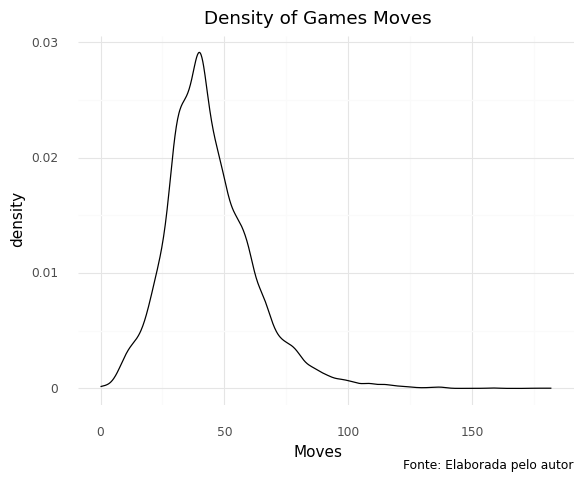

<ggplot: (180483457583)>

In [7]:
(
    ggplot(data, aes(x="Moves"))
    + geom_density(alpha=0.1)
    + theme_minimal()
    + labs(title="Density of Games Moves", caption="Fonte: Elaborada pelo autor")
)

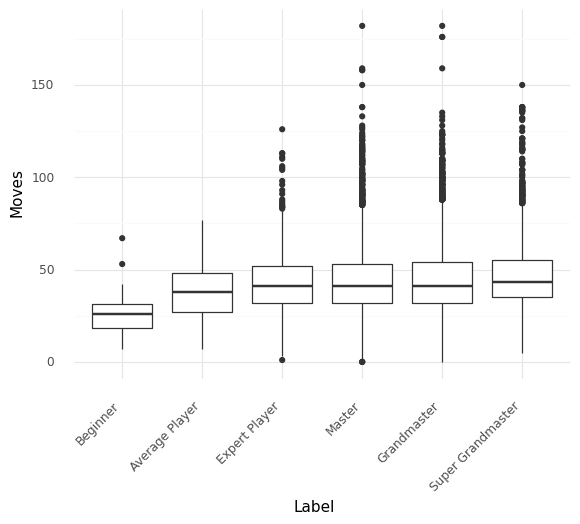

<ggplot: (180483518374)>

In [8]:
(
    ggplot(
        pandas.concat(
            [
                data[["White Label", "Moves"]].rename(columns={"White Label": "Label"}),
                data[["Black Label", "Moves"]].rename(columns={"Black Label": "Label"}),
            ]
        )
    )
    + geom_boxplot(aes(x="Label", y="Moves"))
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)